In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [26]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
from FlyMH import FlyMH

In [27]:
npr.seed(1)
N = 100000
#dataType = "Gaussian"
dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")
MAP = np.array([realMean,realStd])
print(x)

Mean of x = 1.6556605601701955
Std of x = 2.16504884554378
[5.07509561 0.54239736 0.58968207 ... 1.08461525 1.41064377 0.47352231]


In [28]:
def plt_samples(Samples):
    sns.jointplot(x=Samples[:,0],y=Samples[:,1])

Execution time: 74.942591 seconds
[[1.65566056 2.16504885]
 [1.65637024 2.16258388]
 [1.65507014 2.16174304]
 ...
 [1.6488518  2.17105749]
 [1.64793219 2.17130136]
 [1.64992207 2.17109947]]


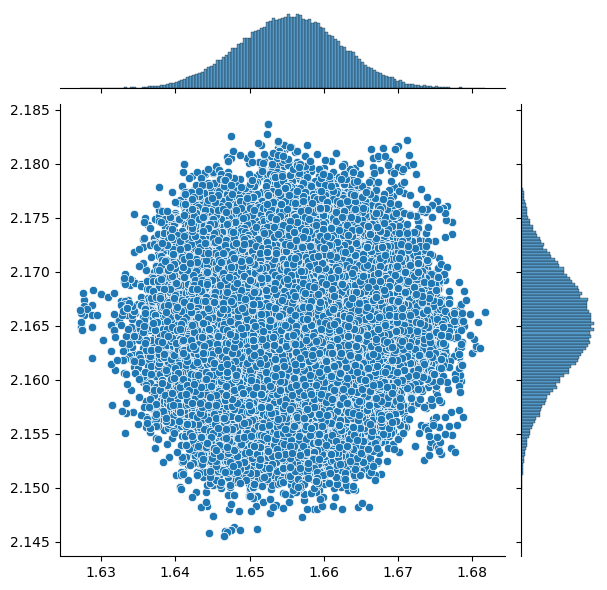

In [31]:
T = 100000
test_vanillMH = MetropolisHastings(x)

start_time = time.time()
test_vanillMH_run = test_vanillMH.run(T, MAP, x)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
print(test_vanillMH_run)
plt_samples(test_vanillMH_run)

Execution time: 32.455209 seconds


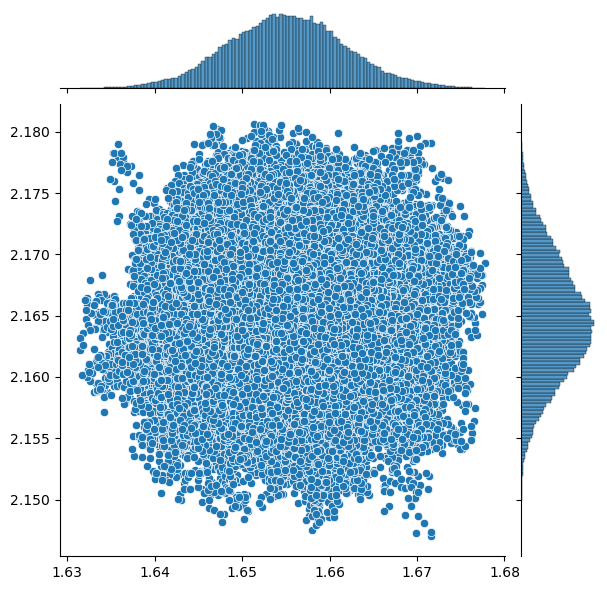

In [33]:
num_batches = 4
T = 100000

test_consMH = ConsensusMH(dataset = x, num_batches=num_batches)

start_time = time.time()
test_consMH_run = test_consMH.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_consMH_run)